# Driver file

In [1]:

#importing libraries

import pandas as pd
import numpy as np

In [2]:
#importing driver id file

driverid=pd.read_csv("data/driver_ids.csv")

In [3]:
#check file

driverid.head(10)

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00
6,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00
7,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00
8,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00
9,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00


In [4]:
#check the types

driverid.dtypes

driver_id              object
driver_onboard_date    object
dtype: object

In [5]:
#check dataframe size

driverid.index

RangeIndex(start=0, stop=937, step=1)

In [6]:
#check nulls

driverid.isnull().value_counts()

driver_id  driver_onboard_date
False      False                  937
dtype: int64

In [7]:
#check if driver is unique


driverid['driver_id'].value_counts().sort_values(ascending=False)


94d5f7697a40886a8723f6015fe47841    1
6f107d977e357e3d22036cc447b354b0    1
2a4afd4ab156dd0a6a0dc48bdf5d8db7    1
581129294fc7d1f43a4d1a372515dfaa    1
630559dc85053c746beafacbd590e8f0    1
                                   ..
6241b9c147df1d0c7027321d4e1d53cf    1
c826130d392023b4c535431e2616e88b    1
881527a718b502bacbd04b6f45fcc2fc    1
74d1c00ab5098202337a91c936b6e080    1
9494350df132e6748afca3bc5d138dcc    1
Name: driver_id, Length: 937, dtype: int64

In [8]:
#change to date time

driverid['driver_onboard_date']=pd.to_datetime(driverid['driver_onboard_date'],errors='coerce')

In [9]:
#confirm

driverid.dtypes

driver_id                      object
driver_onboard_date    datetime64[ns]
dtype: object

In [10]:
#check the year

driverid['driver_onboard_date'].dt.year.value_counts()

2016    937
Name: driver_onboard_date, dtype: int64

In [11]:
#check the month for seasonality

driverid['driver_onboard_date'].dt.month.value_counts()

4    591
5    239
3    107
Name: driver_onboard_date, dtype: int64

In [12]:
#check the day for seasonality

driverid['driver_onboard_date'].dt.day.value_counts()

29    57
5     56
4     50
6     50
12    45
30    44
13    42
11    41
28    38
7     36
14    36
9     34
8     32
31    30
15    29
1     27
10    25
21    24
26    23
20    22
2     22
19    21
22    21
23    20
3     18
17    17
25    17
18    16
27    16
16    15
24    13
Name: driver_onboard_date, dtype: int64

# Rider id

In [13]:
#importing driver id file
riderid=pd.read_csv("data/ride_ids.csv")

In [14]:
#check file

riderid.head(10)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50


In [15]:
#check the types

riderid.dtypes

driver_id          object
ride_id            object
ride_distance       int64
ride_duration       int64
ride_prime_time     int64
dtype: object

In [16]:
#check null values

def ridenulls(column):
    return riderid.loc[riderid[column].isnull()]
    

In [17]:
#call function
#check!!

ridenulls('ride_prime_time')

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time


In [18]:
# distance is in meters and duration in seconds, needs conversion

In [19]:
#check column names

riderid.columns

Index(['driver_id', 'ride_id', 'ride_distance', 'ride_duration',
       'ride_prime_time'],
      dtype='object')

In [20]:
#inser columns with the duration in minutes

riderid["ride_duration_min"]=riderid["ride_duration"]/60

In [21]:
# insert column with the conversion to miles
#1 mile = 1 609.344 meters

riderid["ride_distance_miles"]=riderid["ride_distance"]/1609.344



In [22]:
#confirm

riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942


In [23]:
#testing a result

test=riderid.loc[riderid['ride_id']=="00003037a262d9ee40e61b5c0718f7f0"]
test

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles
167241,d967f5296732fa55266b5f1314e7447b,00003037a262d9ee40e61b5c0718f7f0,3698,1112,0,18.533333,2.297831


In [24]:
#the duration is the time difference between picked_up_at and dropped_off_at



# adding the rates

In [25]:
"""Base Fare $2.00
Cost per Mile $1.15
Cost per Minute $0.22
Service Fee $1.75
Minimum Fare $5.00
Maximum Fare $400.00"""

'Base Fare $2.00\nCost per Mile $1.15\nCost per Minute $0.22\nService Fee $1.75\nMinimum Fare $5.00\nMaximum Fare $400.00'

In [26]:
#add base fare

riderid["base_fare$"]=2

In [27]:
#add cost per mile

riderid["distance_ride_revenue$"]=riderid["ride_distance_miles"]*1.15

In [28]:
#add cost per minute

riderid["duration_ride_revenue$"]=riderid["ride_duration_min"]*0.22

In [29]:
#add service fee

riderid["service_fee$"]=1.75

In [30]:
# sum the ride value before the service fee, so base fare plus duration revenue plus distance revenue

riderid["driver_revenue_before_commission$"]=riderid["base_fare$"]+riderid["distance_ride_revenue$"]+riderid["duration_ride_revenue$"]

In [31]:
# IMPORTANT

# if the commission of lyft is less that 1 (minimum fare 5* 0.2), then it has a decrease commission of 5 - driver_revenue_before_commission$
#it seems lyft pays the driver if the minimum is not reached
# if if the commission of lyft is more than 80 ( maximum fare 400 * 0.2), since the max is 400, the revenue is 80 + (driver_revenue_before_commission$-80)

In [32]:
riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,2,2.940484,3.017667,1.75,7.958150


In [33]:
#put the total of the ride and take the 20% and service fee for the ride and service fee
# group by driver id
#take off possible outliers check plot
#check if the ride id is indeed the unique one
#drop some columns 
#check better the prime time


In [34]:
# riderid["total_price_mile$"]

# Rider Time stamps

In [35]:
#importing driver id file

ridertime=pd.read_csv("data/ride_timestamps.csv")

In [36]:
#check file

ridertime.head(10)

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05
5,00005eae40882760d675da5effb89ae3,requested_at,2016-05-14 05:23:21
6,00005eae40882760d675da5effb89ae3,accepted_at,2016-05-14 05:23:25
7,00005eae40882760d675da5effb89ae3,arrived_at,2016-05-14 05:26:17
8,00005eae40882760d675da5effb89ae3,picked_up_at,2016-05-14 05:26:18
9,00005eae40882760d675da5effb89ae3,dropped_off_at,2016-05-14 05:34:17


In [37]:
# check types

ridertime.dtypes

ride_id      object
event        object
timestamp    object
dtype: object

In [38]:
#change timestamp to correct type

ridertime['timestamp']=pd.to_datetime(ridertime['timestamp'],errors='coerce')

In [39]:
ridertime.dtypes

ride_id              object
event                object
timestamp    datetime64[ns]
dtype: object

In [40]:
#add month

ridertime["month"]=ridertime["timestamp"].dt.month

In [41]:
# check variation

ridertime["month"].value_counts()

5.0    418294
6.0    346486
4.0    199384
3.0      6240
Name: month, dtype: int64

In [42]:
#add day

ridertime["day"]=ridertime["timestamp"].dt.day

In [43]:
# check variation

ridertime["day"].value_counts()

21.0    37040
25.0    36783
15.0    36674
14.0    36555
20.0    36346
26.0    36057
16.0    35572
24.0    35458
17.0    35308
22.0    35098
13.0    34828
23.0    34293
11.0    33543
19.0    32878
10.0    32777
18.0    32595
12.0    32518
7.0     31627
9.0     30766
6.0     30721
4.0     29479
5.0     28832
8.0     28702
3.0     28685
28.0    26637
27.0    26557
2.0     25821
29.0    25775
1.0     24408
30.0    24026
31.0    14045
Name: day, dtype: int64

In [44]:
#add weekday
# Monday=0, Sunday=6

ridertime["weekday"]=ridertime["timestamp"].dt.weekday

In [45]:
# check variation

ridertime["weekday"].value_counts()

4.0    170113
5.0    160010
3.0    149367
2.0    137032
1.0    125905
6.0    120157
0.0    107820
Name: weekday, dtype: int64

In [46]:
# 4 and 5, Friday and Saturday

In [47]:
#add hour

ridertime["hour"]=ridertime["timestamp"].dt.hour

In [48]:
# check variation

ridertime["hour"].value_counts()

19.0    70891
18.0    68947
20.0    64591
21.0    64444
22.0    60147
17.0    57222
23.0    48933
9.0     48835
16.0    48074
8.0     44248
10.0    43713
15.0    43087
11.0    41531
12.0    41165
14.0    40080
13.0    39577
0.0     34220
7.0     32742
1.0     24602
6.0     16653
2.0     15173
5.0      8174
3.0      7371
4.0      5984
Name: hour, dtype: int64

In [49]:
#night time more popular 

In [50]:
ridertime.head()

,ride_id,event,timestamp,month,day,weekday,hour
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,6.0,13.0,0.0,9.0
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,6.0,13.0,0.0,9.0
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,6.0,13.0,0.0,9.0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,6.0,13.0,0.0,9.0
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,6.0,13.0,0.0,10.0


In [51]:
#create a groupby to have the total ride time , or a merge for the event time since request and drop off can be different hours

## 3.1: checking time between events

In [52]:
timedif=ridertime.copy()

In [53]:
timedif.head()

,ride_id,event,timestamp,month,day,weekday,hour
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,6.0,13.0,0.0,9.0
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,6.0,13.0,0.0,9.0
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,6.0,13.0,0.0,9.0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,6.0,13.0,0.0,9.0
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,6.0,13.0,0.0,10.0


In [54]:
#most_recent_per_code = timedif.sort_values('timestamp').groupby(['ride_id'], as_index=False).last()


In [55]:
# driver pay includes time spent waiting, starting one minute after arrival is confirmed
# check difference arrived at and picked up at

waiting_time=timedif.groupby(['ride_id'], as_index=False).nth([2,3])

In [56]:
#check if right

waiting_time.head()

,ride_id,event,timestamp,month,day,weekday,hour
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,6.0,13.0,0.0,9.0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,6.0,13.0,0.0,9.0
7,00005eae40882760d675da5effb89ae3,arrived_at,2016-05-14 05:26:17,5.0,14.0,5.0,5.0
8,00005eae40882760d675da5effb89ae3,picked_up_at,2016-05-14 05:26:18,5.0,14.0,5.0,5.0
12,000061d42cf29f73b591041d9a1b2973,arrived_at,2016-05-16 15:47:29,5.0,16.0,0.0,15.0


In [57]:
#check time difference between requested and dropped of

waiting_time2=waiting_time.groupby(['ride_id'], as_index=False).timestamp.diff()

In [58]:
# introduce the ride id again

waiting_time2['rideid']=waiting_time['ride_id']

In [59]:
waiting_time2.head()

,timestamp,rideid
2,NaT,00003037a262d9ee40e61b5c0718f7f0
3,0 days 00:00:02,00003037a262d9ee40e61b5c0718f7f0
7,NaT,00005eae40882760d675da5effb89ae3
8,0 days 00:00:01,00005eae40882760d675da5effb89ae3
12,NaT,000061d42cf29f73b591041d9a1b2973


In [60]:
#drop nulls

waiting_time2=waiting_time2.dropna() 

In [61]:
#confirm

waiting_time2

,timestamp,rideid
3,0 days 00:00:02,00003037a262d9ee40e61b5c0718f7f0
8,0 days 00:00:01,00005eae40882760d675da5effb89ae3
13,0 days 00:00:03,000061d42cf29f73b591041d9a1b2973
18,0 days 00:00:04,00006efeb0d5e3ccad7d921ddeee9900
23,0 days 00:00:03,0000d9b24d8ccdd991b76258e616fa01
...,...,...
970383,0 days 00:00:03,fffebb46effb90ce758fdff68b569355
970388,0 days 00:00:02,ffff9c38173ddfa17bdd115c463e329f
970393,0 days 00:00:02,ffff9e431f7fade54b2550ac19ab6e64
970398,0 days 00:00:01,ffffa07f48f2f885f714765d794ad596


In [62]:
#waiting time in minutes

waiting_time2['waiting_minutes'] = waiting_time2['timestamp'].dt.total_seconds().div(60).astype(int)

In [63]:
#check sorter values

waiting_time2.sort_values(by=['waiting_minutes'], ascending=False)

,timestamp,rideid,waiting_minutes
775388,0 days 00:13:51,ccc322deb9027f2652c5b784f46301b7,13
500398,0 days 00:11:23,845063fbad82733755a21d025b3da831,11
864318,0 days 00:07:06,e40251551258dc1c387039892e3bd277,7
30883,0 days 00:05:11,0812d4aa653b5ca9d32a360c9d9f68b9,5
179278,0 days 00:05:10,2f7a5d23e08e6042e3e8efb11d3e4701,5
...,...,...,...
755538,-1 days +23:16:22,c7975399543ee7bf0a1f9cd869d0d80f,-43
513378,-1 days +23:15:24,87b6e22b8618d40283d93802698fdcbf,-44
175918,-1 days +23:09:11,2e8b3bf2654e9ea4787d8efd2f2291bd,-50
692263,-1 days +23:02:04,b6c1bfcb6a1bacfc3733fc24847803f2,-57


In [64]:
#only keep minutes >=1

waiting_time2['waiting_minutes'] = np.where(waiting_time2['waiting_minutes'] >= 1, waiting_time2['waiting_minutes'], "Not relevant")


In [65]:
#drop non relevant

waiting_time2.drop(waiting_time2[waiting_time2['waiting_minutes'] == 'Not relevant'].index, inplace=True)

In [66]:
#check

waiting_time2["waiting_minutes"].value_counts()

1     3780
2       19
3        8
5        5
11       1
13       1
7        1
Name: waiting_minutes, dtype: int64

In [67]:
#change type

waiting_time2["waiting_minutes"] = waiting_time2["waiting_minutes"].astype(float)

In [68]:
#confirm

waiting_time2.dtypes

timestamp          timedelta64[ns]
rideid                      object
waiting_minutes            float64
dtype: object

In [69]:
# adding the cost for waiting time
#Cost per Minute $0.22
waiting_time2["cost_waiting_time$"]=waiting_time2["waiting_minutes"]*0.22

In [70]:
#confirm

waiting_time2.head()

,timestamp,rideid,waiting_minutes,cost_waiting_time$
78,0 days 00:01:00,000399d2e73490f5ac5e65eae391f6f8,1.0,0.22
608,0 days 00:01:00,002a1cf462fee4f6c9d8da11fca4830a,1.0,0.22
708,0 days 00:01:00,003115b37c952878769e2f2a585cf664,1.0,0.22
1033,0 days 00:01:00,0046dbc3563e3f59405c1a5360863942,1.0,0.22
1183,0 days 00:01:00,004edbe47f7b98f0ceb65dd3f40b60c3,1.0,0.22


# 2. ANALYSIS

In [71]:
#keeping first and last event of the same ride

#first_last_code = timedif.groupby(['ride_id'], as_index=False).nth([0,-1])

In [72]:
#first_last_code['time_diff_dropoff_req'] = pd.to_datetime(first_last_code['timestamp'].astype(str)).diff(-1).dt.total_seconds().div(60)

# 2.1. Value Analysis

In [73]:
# Lyft earning assumptions

#some assumptions here
# if the commission of lyft is less that 1 (minimum fare 5* 0.2), then it has a decrease commission of 5 - driver_revenue_before_commission$ or 0.8(5 - X)
#it seems lyft pays the driver if the minimum is not reached
# if if the commission of lyft is more than 80 ( maximum fare 400 * 0.2), since the max is 400, the revenue is 80 + (driver_revenue_before_commission$-80)
# taking into consideration waiting time too

In [74]:
waiting_time2.head()

,timestamp,rideid,waiting_minutes,cost_waiting_time$
78,0 days 00:01:00,000399d2e73490f5ac5e65eae391f6f8,1.0,0.22
608,0 days 00:01:00,002a1cf462fee4f6c9d8da11fca4830a,1.0,0.22
708,0 days 00:01:00,003115b37c952878769e2f2a585cf664,1.0,0.22
1033,0 days 00:01:00,0046dbc3563e3f59405c1a5360863942,1.0,0.22
1183,0 days 00:01:00,004edbe47f7b98f0ceb65dd3f40b60c3,1.0,0.22


In [75]:
riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,2,2.940484,3.017667,1.75,7.958150


In [76]:
#in order to add the waiting time, df with waiting time information needs to be merged with ride information

total_revenue_df=riderid.merge(waiting_time2, how="left", left_on="ride_id", right_on="rideid")

In [77]:
#the nulls from the merge should be put to zero

total_revenue_df["cost_waiting_time$"]=total_revenue_df["cost_waiting_time$"].fillna(0)

In [78]:
#confirm 

total_revenue_df.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$,timestamp,rideid,waiting_minutes,cost_waiting_time$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,2,1.294099,1.199000,1.75,4.493099,NaT,NaN,NaN,0.0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,2,2.402407,2.966333,1.75,7.368741,NaT,NaN,NaN,0.0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,2,2.345241,2.097333,1.75,6.442575,NaT,NaN,NaN,0.0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,2,46.649722,12.239333,1.75,60.889055,NaT,NaN,NaN,0.0
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,2,2.940484,3.017667,1.75,7.958150,NaT,NaN,NaN,0.0


In [79]:
#add the costs to the driver_revenue_before_commission

total_revenue_df["final_driver_revenue_before_commission$"]=total_revenue_df["driver_revenue_before_commission$"]+total_revenue_df["cost_waiting_time$"]

In [80]:
#ATTENTION prime time is probably in KM, worhth analysing?
#check if riders with higher average primetime are the ones earning more?

In [81]:
#to calculate lyft revenue some columns are not needed

coldrop=["ride_distance","ride_duration","ride_prime_time","ride_duration_min","ride_distance_miles","timestamp","rideid","waiting_minutes","driver_revenue_before_commission$"]
lifetime_revenue_df=total_revenue_df.drop(coldrop, axis=1)

In [82]:
#check

lifetime_revenue_df.head()

,driver_id,ride_id,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,2,1.294099,1.199000,1.75,0.0,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,2,2.402407,2.966333,1.75,0.0,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,2,2.345241,2.097333,1.75,0.0,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,2,46.649722,12.239333,1.75,0.0,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,2,2.940484,3.017667,1.75,0.0,7.958150


In [83]:
# lyft commission is 20%

lifetime_revenue_df["lyft_20_revenue"]=lifetime_revenue_df["final_driver_revenue_before_commission$"]*0.2

In [85]:
#adding min and max fares

#some assumptions here
# if the commission of lyft is less that 1 (minimum fare 5* 0.2), then it has a decrease commission of 5 - driver_revenue_before_commission$ or 0.8(5 - X)
#it seems lyft pays the driver if the minimum is not reached
# if if the commission of lyft is more than 80 ( maximum fare 400 * 0.2), since the max is 400, the revenue is  80 +(driver_revenue_before_commission$-400)
# taking into consideration waiting time too

In [86]:
#add the minimum fare condition

lifetime_revenue_df["lyft_20_revenue_min"] = np.where(lifetime_revenue_df["lyft_20_revenue"] < 1,(lifetime_revenue_df["lyft_20_revenue"]-(0.8*(5-lifetime_revenue_df["final_driver_revenue_before_commission$"]))) , lifetime_revenue_df["lyft_20_revenue"])

In [121]:
#check

lifetime_revenue_df.head()

,driver_id,ride_id,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,2,1.294099,1.199000,1.75,0.0,4.493099,0.898620,0.493099,0.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,2,2.402407,2.966333,1.75,0.0,7.368741,1.473748,1.473748,1.473748
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,2,2.345241,2.097333,1.75,0.0,6.442575,1.288515,1.288515,1.288515
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,2,46.649722,12.239333,1.75,0.0,60.889055,12.177811,12.177811,12.177811
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,2,2.940484,3.017667,1.75,0.0,7.958150,1.591630,1.591630,1.591630


In [88]:
#add the maximum fare condition

lifetime_revenue_df["lyft_20_revenue_final"]= np.where(lifetime_revenue_df["lyft_20_revenue"] > 80, (80 + (lifetime_revenue_df["final_driver_revenue_before_commission$"]-400)),lifetime_revenue_df["lyft_20_revenue_min"])
                                                                                                                                                                             

In [89]:
#check an example

lifetime_revenue_df[lifetime_revenue_df["lyft_20_revenue"]>80]

,driver_id,ride_id,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final
1921,02d6a6b8a6da15fc219a9570f7ebbe78,e7f8524051edb7b28e86391f6461bc03,2,517.838852,103.414667,1.75,0.0,623.253519,124.650704,124.650704,303.253519


In [122]:
# one last fee needs to be added, the service fee
#lyft gets the total ammount

lifetime_revenue_df["lyft_total_revenue_ride$"]=lifetime_revenue_df["lyft_20_revenue_final"]+lifetime_revenue_df["service_fee$"]

In [123]:
#check

lifetime_revenue_df.head()

,driver_id,ride_id,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final,lyft_total_revenue_ride$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,2,1.294099,1.199000,1.75,0.0,4.493099,0.898620,0.493099,0.493099,2.243099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,2,2.402407,2.966333,1.75,0.0,7.368741,1.473748,1.473748,1.473748,3.223748
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,2,2.345241,2.097333,1.75,0.0,6.442575,1.288515,1.288515,1.288515,3.038515
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,2,46.649722,12.239333,1.75,0.0,60.889055,12.177811,12.177811,12.177811,13.927811
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,2,2.940484,3.017667,1.75,0.0,7.958150,1.591630,1.591630,1.591630,3.341630


In [124]:
#average per driver

driver_mean_df = lifetime_revenue_df.groupby(['driver_id'], as_index = False).agg({ 'lyft_total_revenue_ride$': 'mean'}).sort_values(by='lyft_total_revenue_ride$', ascending = False)


In [125]:
#call the df

driver_mean_df

,driver_id,lyft_total_revenue_ride$
9,02d6a6b8a6da15fc219a9570f7ebbe78,9.808984
800,d9ef4b835e202c9b24315b999894362a,5.813543
87,186d02f3ae489428440a352e3fe503a4,5.164416
131,22d43c4cd79a3cbab663d9eadd1e5995,5.129261
859,e680a2b4ece6a7010a4451601d73aa62,5.119327
...,...,...
758,ce577ac73e9022772835abf8d37e91d5,3.056216
640,a7fa04a6b4111cac92989ac266ec40d2,3.027291
309,4f06c1412e8f2c16c96abb053997112f,2.997937
119,1ed175c60fdf7380fefc804bf4dd75f3,2.913328


In [126]:
# mean earnings per ride per driver

driver_mean_df["lyft_total_revenue_ride$"].mean()

3.708748038606655

In [ ]:
#want to create a cluster for not frequent, regular, frequent drivers

In [129]:
driver_frequency_lifetime_df = lifetime_revenue_df.groupby(['driver_id'], as_index = False).agg({ 'ride_id':'count','lyft_total_revenue_ride$': 'mean'}).sort_values(by='ride_id', ascending = False)

In [130]:
#check

driver_frequency_lifetime_df

,driver_id,ride_id,lyft_total_revenue_ride$
354,5ccc0e6dc9c7475caf785cdce7b8eb7a,919,3.632313
308,4eb382d1f7d50fae1294964263d1ce82,831,3.531804
509,844e9be5a30d8d9c1f8e9ddb086ff717,821,3.594008
401,689bdf87fb2de49f98bf4946cfaa5068,794,3.383696
217,3788dc9e91f1548816ce8b5af07ddadc,783,3.835977
...,...,...,...
435,706466935b9e1d04e4e116be7ce90ea9,19,3.446007
922,fd831ca1d79ae5c6fc3a679a22e5b8cf,19,3.095905
424,6df6c8f8d3c2a93314245a604c02bed1,16,4.157381
494,7ff85c5c0e9324e28d1e0d0589c364bd,3,3.666484


In [147]:
# for the lifetime average, check average count of rides and revenue per ride

lifetime_stats=driver_frequency_lifetime_df.describe().transpose()
lifetime_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,937.0,206.512273,173.254063,3.000000,47.000000,200.000000,316.000000,919.000000
lyft_total_revenue_ride$,937.0,3.708748,0.411728,2.281675,3.467148,3.628549,3.866596,9.808984


In [149]:
# average lifetime would then be

total_avg_lifetime=206.512273*3.708748
total_avg_lifetime

765.9019794642039

In [132]:
# check the descriptive statistics
# will use the IQR and define the regular driver as the bulk of values, IQR, < IQR as less frequent drivers and > IQR frequent drivers

descriptive=driver_frequency_lifetime_df["ride_id"].describe().transpose()

descriptive

count    937.000000
mean     206.512273
std      173.254063
min        3.000000
25%       47.000000
50%      200.000000
75%      316.000000
max      919.000000
Name: ride_id, dtype: float64

In [135]:
#clustering info

descriptive["IQR"] = descriptive["75%"] - descriptive["25%"]
print("IQR",descriptive["IQR"])
print("25", descriptive["25%"])
print("75", descriptive["75%"])

IQR 269.0
25 47.0
75 316.0


In [90]:
# occasional =< 47
# 47 < average < 316
# frequent >= 316

In [138]:
#occasional drivers

occasional_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]<=47)]


In [139]:
#confirm

occasional_df

,driver_id,ride_id,lyft_total_revenue_ride$
320,52bc8ebc7db90d5b77453bf475677ebd,47,3.475375
505,838495eb3f025e512228480eae127522,47,3.176864
900,f395649fb47860aebc4817c7a6ea90e6,47,3.478963
273,44e9f61af64c2d25412a0f4532ada63c,47,3.086757
565,94699541835b03d2a18e265299c11213,47,4.382304
...,...,...,...
435,706466935b9e1d04e4e116be7ce90ea9,19,3.446007
922,fd831ca1d79ae5c6fc3a679a22e5b8cf,19,3.095905
424,6df6c8f8d3c2a93314245a604c02bed1,16,4.157381
494,7ff85c5c0e9324e28d1e0d0589c364bd,3,3.666484


In [140]:
# mean earnings occasional driver cluster per ride per driver

occasional_df["lyft_total_revenue_ride$"].mean()

3.698817386629186

In [150]:
#check the average lifetime value of an occasional driver

occasional_df_stats=occasional_df.describe().transpose()
occasional_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,245.0,35.987755,7.631622,3.000000,31.000000,37.000000,42.00000,47.000000
lyft_total_revenue_ride$,245.0,3.698817,0.431926,2.281675,3.387837,3.643674,3.94524,5.164416


In [151]:
# occasional driver lifetime value taken into consideration the average amount of rides and the value

occasional_avg_lifetime=25.987755*3.698817
occasional_avg_lifetime

96.123949985835

In [141]:
#average driver

average_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]>47)&(driver_frequency_lifetime_df["ride_id"]<316)]

In [143]:
# mean earnings average driver cluster per ride per driver

average_df["lyft_total_revenue_ride$"].mean()

3.7402017748348073

In [152]:
#check the average lifetime value of an average driver

average_df_stats=average_df.describe().transpose()
average_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,455.0,173.419780,90.52148,48.000000,66.500000,203.000000,250.500000,315.000000
lyft_total_revenue_ride$,455.0,3.740202,0.45633,3.027291,3.491933,3.645725,3.899092,9.808984


In [154]:
# average driver lifetime value taken into consideration the average amount of rides and the value

average_avg_lifetime=173.419780*3.740202
average_avg_lifetime

648.62500799556

In [144]:
#frequent drivers

frequent_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]>316)]

In [146]:
# mean earnings average driver cluster per ride per driver

frequent_df["lyft_total_revenue_ride$"].mean()

3.6561836249835893

In [155]:
#check the average lifetime value of a frequent driver

frequent_df_stats=frequent_df.describe().transpose()
frequent_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,234.0,447.995726,114.552666,317.000000,360.250000,422.000000,503.25000,919.000000
lyft_total_revenue_ride$,234.0,3.656184,0.271176,3.231554,3.486121,3.601187,3.76544,5.129261


In [156]:
# average driver lifetime value taken into consideration the average amount of rides and the value

frequent_avg_lifetime=447.995726*3.656184
frequent_avg_lifetime

1637.954805469584

In [ ]:
#reasons?
#can we correlate distance with average earnings?
#can we correlate time with average earnings?

# Projected lifetime

In [95]:
# What is the average projected lifetime of a driver? That is, once a driver is onboarded,
#how long does he/she typically continue driving with Lyft.


In [96]:
#merge tables to get the orboarded time until last recorded drive

mergeids=driverid.merge(riderid, left_on="driver_id", right_on="driver_id")

In [97]:
mergeids.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,2,2.940484,3.017667,1.75,7.958150


In [98]:
mergeids2=mergeids.merge(timedif, left_on="ride_id", right_on="ride_id")

In [99]:
mergeids2.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$,event,timestamp,month,day,weekday,hour
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,2,1.294099,1.199,1.75,4.493099,requested_at,2016-04-23 02:13:50,4.0,23.0,5.0,2.0
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,2,1.294099,1.199,1.75,4.493099,accepted_at,2016-04-23 02:14:15,4.0,23.0,5.0,2.0
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,2,1.294099,1.199,1.75,4.493099,arrived_at,2016-04-23 02:16:36,4.0,23.0,5.0,2.0
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,2,1.294099,1.199,1.75,4.493099,picked_up_at,2016-04-23 02:16:40,4.0,23.0,5.0,2.0
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,2,1.294099,1.199,1.75,4.493099,dropped_off_at,2016-04-23 02:22:07,4.0,23.0,5.0,2.0


In [100]:
onboarding_lastridedf = mergeids2.drop(["ride_distance","ride_duration","ride_prime_time","ride_duration_min","ride_distance_miles","base_fare$","duration_ride_revenue$","distance_ride_revenue$","service_fee$","driver_revenue_before_commission$","month","day","weekday","hour"], axis=1)

onboarding_lastridedf.head()

,driver_id,driver_onboard_date,ride_id,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,dropped_off_at,2016-04-23 02:22:07


In [101]:
#check the date difference

last_ride = onboarding_lastridedf.sort_values('timestamp').groupby(['driver_id'], as_index=False).last()

In [103]:
#check the types for calculation

last_ride.dtypes

driver_id                      object
driver_onboard_date    datetime64[ns]
ride_id                        object
event                          object
timestamp              datetime64[ns]
dtype: object

In [104]:
#put on the same

last_ride['timestamp'] = last_ride['timestamp'].dt.date
last_ride['driver_onboard_date'] = last_ride['driver_onboard_date'].dt.date


In [105]:
calculate 

last_ride["time_onboard_to_last_ride"]=last_ride["timestamp"]-last_ride["driver_onboard_date"]

In [106]:
last_ride

,driver_id,driver_onboard_date,ride_id,event,timestamp,time_onboard_to_last_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,93075a021099783be0af4afa8b3ee7ed,dropped_off_at,2016-06-23,86 days
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,d31d7c47c230715656f7842f2ef4641a,dropped_off_at,2016-06-22,85 days
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2029bd672ace7ce8f7d92d69a34a37a1,dropped_off_at,2016-06-12,68 days
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,d19a77f52782f6f0e299101dd82af9f0,dropped_off_at,2016-06-26,64 days
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,c1da2e61a6a44505ee12402f413c0878,dropped_off_at,2016-06-24,56 days
...,...,...,...,...,...,...
832,ff419a3476e21e269e340b5f1f05414e,2016-04-26,610509a5b6635f58b48d68c67a94d4e7,dropped_off_at,2016-06-26,61 days
833,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,e8b6f63fc3ab95778bcab5cc81a3f2a4,dropped_off_at,2016-06-17,81 days
834,fff482c704d36a1afe8b8978d5486283,2016-04-08,e330cc9fc3b9357c4ccc133231eb42b7,dropped_off_at,2016-05-12,34 days
835,fffecccc49436c5389075b13209f0dfa,2016-05-06,7d929a0c070f94225bb7f918772ab009,dropped_off_at,2016-06-26,51 days


In [107]:
#import ploting and stats lib

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [108]:
#convert into int to plot

last_ride["time_onboard_to_last_ride"]=last_ride["time_onboard_to_last_ride"].dt.days

In [109]:
#check if correct

last_ride.dtypes

driver_id                    object
driver_onboard_date          object
ride_id                      object
event                        object
timestamp                    object
time_onboard_to_last_ride     int64
dtype: object

In [110]:
#check min for reference

meanline=last_ride["time_onboard_to_last_ride"].mean()
meanline

55.10513739545998

Text(0.5, 1.0, 'Driver`s lifetime (days)')

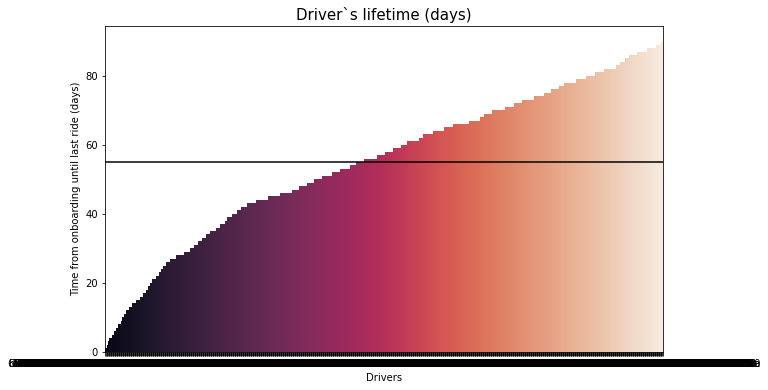

In [111]:
#plot checking for trends

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=last_ride,
                x="driver_id",
                y="time_onboard_to_last_ride",
                order=last_ride.sort_values('time_onboard_to_last_ride').driver_id,
                palette="rocket",
                ax=ax);
ax.axhline (meanline, color="black")
plt.xlabel("Drivers", size=10)
plt.ylabel("Time from onboarding until last ride (days)", size=10)
plt.title("Driver`s lifetime (days)", size=15)

In [162]:
driver_onboarding_df=last_ride[["driver_id","time_onboard_to_last_ride"]]

In [163]:
driver_onboarding_df.head()

,driver_id,time_onboard_to_last_ride
0,002be0ffdc997bd5c50703158b7c2491,86
1,007f0389f9c7b03ef97098422f902e62,85
2,011e5c5dfc5c2c92501b8b24d47509bc,68
3,0152a2f305e71d26cc964f8d4411add9,64
4,01674381af7edd264113d4e6ed55ecda,56


In [167]:
#call driver_frequency_lifetime_df to merge

driver_frequency_lifetime_df.head()

,driver_id,ride_id,lyft_total_revenue_ride$
354,5ccc0e6dc9c7475caf785cdce7b8eb7a,919,3.632313
308,4eb382d1f7d50fae1294964263d1ce82,831,3.531804
509,844e9be5a30d8d9c1f8e9ddb086ff717,821,3.594008
401,689bdf87fb2de49f98bf4946cfaa5068,794,3.383696
217,3788dc9e91f1548816ce8b5af07ddadc,783,3.835977


In [169]:
#check for correlation amount of rides and time staying on board

avg_nr_rides_df=driver_onboarding_df.merge(driver_frequency_lifetime_df, left_on="driver_id", right_on="driver_id")
avg_nr_rides_df.columns=["driver_id","time_onboard_to_last_ride","number_of_rides","lyft_total_revenue_ride$"]
avg_nr_rides_df.head()

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$
0,002be0ffdc997bd5c50703158b7c2491,86,277,3.528583
1,007f0389f9c7b03ef97098422f902e62,85,31,3.058267
2,011e5c5dfc5c2c92501b8b24d47509bc,68,34,3.824111
3,0152a2f305e71d26cc964f8d4411add9,64,191,3.812694
4,01674381af7edd264113d4e6ed55ecda,56,375,3.974707


In [170]:
#import stats library

import statsmodels.api as sm

In [174]:
#check linear regression

avg_nr_rides_df2=avg_nr_rides_df.copy()

avg_nr_rides_df2=sm.add_constant(avg_nr_rides_df2)
y=avg_nr_rides_df2["time_onboard_to_last_ride"]
X=avg_nr_rides_df2[["const", "number_of_rides","lyft_total_revenue_ride$"]]

reg=sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     time_onboard_to_last_ride   R-squared:                       0.291
Model:                                   OLS   Adj. R-squared:                  0.289
Method:                        Least Squares   F-statistic:                     171.2
Date:                       Fri, 18 Dec 2020   Prob (F-statistic):           5.00e-63
Time:                               13:29:51   Log-Likelihood:                -3619.9
No. Observations:                        837   AIC:                             7246.
Df Residuals:                            834   BIC:                             7260.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.6613      5.901      3.671      0.000      10.078      33.245
number_of_rides              0.0661      0.004     18.466      0.000       0.059       0.073
lyft_total_revenue_ride$     5.0892      1.542      3.301      0.001       2.064       8.115
==============================================================================
Omnibus:                       45.326   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.152
Skew:                          -0.051   Prob(JB):                     0.000114
Kurtosis:                       2.286   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
#plot
#take outliers - only when clustering by money generated?

In [113]:
#  What are the main factors that affect a driver’s lifetime value?

# time, distance etc?

In [114]:
#check how much the ones staying longer earned and how many drives

In [115]:
# merge lifetime_revenue_df and last_ride to know how much the drives staying longer earned in average - scatter plot with average time and earning

In [116]:
# also check correlation here

In [117]:
#drivers churn in 1, 2 or 3 months perspective?


In [118]:
# drivers at friday and saturday night probably add more value - more rides at least, check if more money?

In [119]:
# for the churn, make bins like https://github.com/Brunadiasmiguel/illegal_fishing/blob/master/data_analysis/analysis_prediction_model.ipynb

# Churn

# Analysis driver perspective